### ASTR 4260 Modeling the Universe
### Final Project
Ana Lam
April 29, 2020

Astronomers use many fundamental parameters to characterize exoplanets. The NASA exoplanet archive includes and classifies planets that meet the following criteria:
* Mass is $\leq$ 30 Jupiter masses
* The planet is not free floating
* Has undergone validation checks so that false positivity is unlikely
* The above along with additional physical properties are published in peer-reviewed publications

The majority of the confirmed exoplanets, however, do not have extracted observables  for each of the parameters. Therefore, it is of great interest to estimate these missing parameters. One way of estimating parameters, is by examining the relations between several different parameters.

In 2019, Ulmer-Moll et al. conduted a examination of the mass-radius relation in exoplanets using random forests, a machine learning algorithm, to compute estimated radii from known mass observables from exoplanets. In this project, I will be using the random forests method to examine radius relations with different physical properties and conduct a feature importance test to determine the relation I will use to compute estimated radii.

#### I. Data Selection and Initial Inverstigation of Physical Properties
The data that will be used is from NASA Exoplanet Archive's confirmed planets table.

In [4]:
import numpy as np
import csv
import pandas as pd

data = pd.read_csv("exoplanet_data.csv")  # read in confirmed exoplanet data from NASA exoplanet archive
data = data.dropna()
data.head()

,pl_name,pl_orbsmax,pl_orbeccen,st_dist,pl_eqt,pl_masse,pl_rade,st_metfe
66,CoRoT-10 b,0.10550,0.53,345.0,600.0,874.000,10.87,0.26
67,CoRoT-11 b,0.04360,0.00,560.0,1657.0,740.510,16.03,-0.03
68,CoRoT-12 b,0.04016,0.07,1150.0,1442.0,291.438,16.14,0.16
69,CoRoT-13 b,0.05100,0.00,1060.0,1700.0,415.704,9.92,0.01
70,CoRoT-14 b,0.02700,0.00,1340.0,1952.0,2415.400,12.22,0.05


To get an initial look at the relation trends, I will plot each physical property in relation with planet radii.

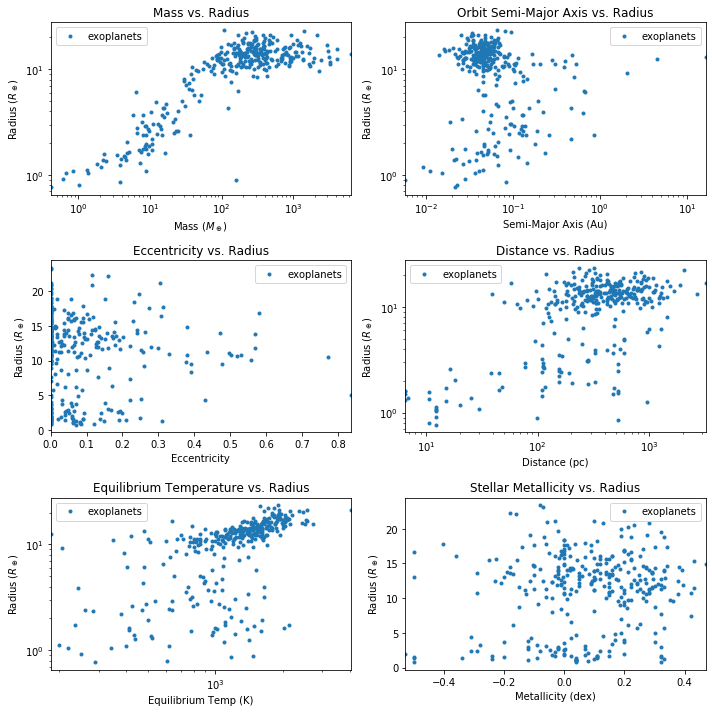

In [5]:
import matplotlib.pyplot as plt

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
df = pd.DataFrame(data)

df.plot(x = 'pl_masse', y = 'pl_rade', style ='.', label = 'exoplanets', ax=ax1) # plot mass-radius relation
ax1.set_title("Mass vs. Radius")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel("Mass ($M_\oplus$)")
ax1.set_ylabel("Radius ($R_\oplus$)")
df.plot(x = 'pl_orbsmax', y = 'pl_rade', style='.', label= 'exoplanets', ax=ax2) # plot orbit semi-major axis-radius relation
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title("Orbit Semi-Major Axis vs. Radius")
ax2.set_xlabel("Semi-Major Axis (Au)")
ax2.set_ylabel("Radius ($R_\oplus$)")
df.plot(x = 'pl_orbeccen', y = 'pl_rade', style ='.', label = 'exoplanets', ax=ax3) # eccentricity-radius relation
ax3.set_title("Eccentricity vs. Radius")
ax3.set_xlabel("Eccentricity")
ax3.set_ylabel("Radius ($R_\oplus$)")
df.plot(x = 'st_dist', y = 'pl_rade', style ='.', label = 'exoplanets', ax=ax4) # stellar distance-radius relation
ax4.set_title("Distance vs. Radius")
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel("Distance (pc)")
ax4.set_ylabel("Radius ($R_\oplus$)")
df.plot(x = 'pl_eqt', y = 'pl_rade', style ='.', label = 'exoplanets', ax=ax5) # equilibrium temperature-radius relation
ax5.set_title("Equilibrium Temperature vs. Radius")
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlabel("Equilibrium Temp (K)")
ax5.set_ylabel("Radius ($R_\oplus$)")
df.plot(x = 'st_metfe', y = 'pl_rade', style ='.', label = 'exoplanets', ax=ax6) # stellar metallicity-radius relation
ax6.set_title("Stellar Metallicity vs. Radius")
ax6.set_xlabel("Metallicity (dex)")
ax6.set_ylabel("Radius ($R_\oplus$)")

plt.tight_layout()

From the plots, it looks like the mass-radius relation has the most significant trend. This is consistent with what was established by Ulmer-Moll et al. 

#### II. Random Forest Alogrithm
Create training and testing sets for Random Forests.

In [10]:
target = np.array(data['pl_rade'])  # convert dataframe of planet radii to array

parameters = data.drop('pl_rade', axis=1) # select other physical properties

parameter_list = list(parameters.columns)

parameters = np.array(parameters) # convert physical properties data frame into array

In [11]:
from sklearn.model_selection import train_test_split

# create training and testing sets (75%-25% of data)

train_parameters, test_parameters, train_target, test_target = train_test_split(parameters, target, test_size = 0.25, random_state = 42)

In [436]:
print("Training parameters shape:", train_parameters.shape)  # check shape of sets to confirm
print("Training target shape:", train_target.shape)
print("Testing parameters shape:", test_parameters.shape)
print("Testing target shape:", test_target.shape)

Training parameters shape: (242, 6)
Training target shape: (242,)
Testing parameters shape: (81, 6)
Testing target shape: (81,)


In [437]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) # estimate using random forest with 1000 trees
rf.fit(train_parameters, train_target) # fit with random forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [438]:
predict = rf.predict(test_parameters) # yield predicted y values with random forest
errors = abs(predict - test_target) # calculate error

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')

Mean Absolute Error: 1.58 degrees


In [439]:
mean_absolute_percent_error = 100 * (errors/test_target) # percent error

accuracy = 100 - np.mean(mean_absolute_percent_error) # calculate percent accuracy
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 80.35 %


In [274]:
print('Parameters in use:', rf.get_params()) # print parameters of random forest

Parameters in use: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### II. Optimizing the Random Forest Algorithm

Now, I am going to go ahead and optimize the parameters for the random forest algorithm as suggested by the scikit-learn documentation to see if non-default parameters would work better.

In [281]:
n_estimators = [1000, 1500, 2000] # array of n estimators to test
max_features = ['auto', 'sqrt', 'log2'] # array of max_features to test
max_depth = [10, 20, 30] # array of max_depth values to test
max_depth.append(None) 
min_samples_split = [2, 5, 10] # array of min_samples_split to test
min_samples_leaf = [1, 2, 3] # array of min_samples_leaf to test
bootstrap = [True, False] # bootstrap values to test

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} # create random grid to test parameters

In [284]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200,
                              cv = 5, verbose = 2, random_state = 4242, n_jobs = -1)
# randomizedsearchCV for best parameters


In [285]:
rf_random.fit(parameters, target)
print(rf_random.best_params_) # yield best parameters

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.8min finished
C:\Users\anakr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


We can now retrain the random forest to yield a better result.

In [440]:
rf_best = RandomForestRegressor(n_estimators = 2000, max_depth = 10, min_samples_split = 2, min_samples_leaf = 3,
                                max_features = 'auto', bootstrap = True, random_state = 42)
rf_best.fit(train_parameters, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [441]:
predict_best = rf_best.predict(test_parameters)
errors_best = abs(predict_best - test_target)

print('Mean Absolute Error:', round(np.mean(errors_best), 2), 'degrees')

Mean Absolute Error: 1.56 degrees


In [442]:
mean_absolute_percent_error_best = 100 * (errors_best/test_target)

accuracy_best = 100 - np.mean(mean_absolute_percent_error_best)
print('Accuracy:', round(accuracy_best, 2), '%')

Accuracy: 80.44 %


So we gained 0.09% accuracy.

#### III. Best Features Investigation

Now, we can investigate which feature is most important in determining planet radii.

['pl_orbsmax' 'pl_orbeccen' 'st_dist' 'pl_eqt' 'pl_masse' 'st_metfe']


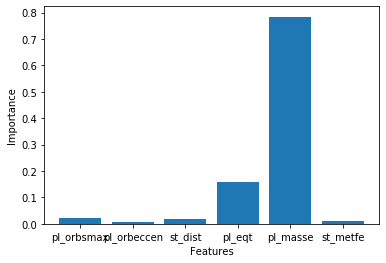

In [310]:
importance = rf_best.feature_importances_ # scikit-learn best feature importance computation
features = np.array(data.columns) # features = semi-major orbital axis, eccentricity, stellar distance, 
                                        #equilibrium temperature, planet mass, and stellar metallicity
features = np.delete(features, 5) # delete planet radius

plt.bar(features, importance) # plot importance of features
plt.xlabel("Features")
plt.ylabel("Importance")
print(features)

Planet mass is a significant feature that determines planet radius. In fact, it vastly surpasses most other features. 

#### IV. Mass-Radius Relation

I will graph the mass-radius relation once again. We can select the mass and radius data and fit a linear regression to its relationship.

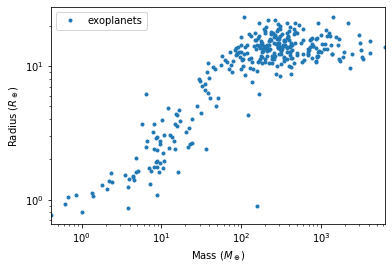

In [21]:
df.plot(x = 'pl_masse', y = 'pl_rade', style='.', label = 'exoplanets')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Mass ($M_\oplus$)")
plt.ylabel("Radius ($R_\oplus$)")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

x = data['pl_masse'].values.reshape(-1,1)  # extract mass data
log_x = np.log(x)
y = data['pl_rade'].values.reshape(-1,1) # extract radius data
log_y = np.log(y)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(log_x, log_y, test_size = 0.2, random_state=420) # create train-test set

In [14]:
reg = LinearRegression() # linear regression
reg.fit(x_train, y_train) # fit linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(reg.intercept_) # linear intercept
print(reg.coef_) # coefficient of linear relationship

[0.25980704]
[[0.39285584]]


In [16]:
y_pred = reg.predict(log_x) # yield predicted radius values based on linear regression

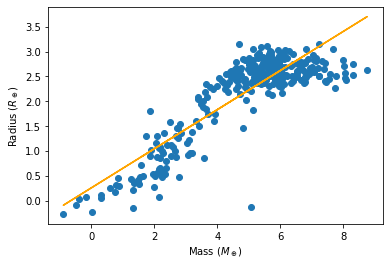

In [22]:
plt.scatter(log_x, log_y) 
plt.plot(log_x, y_pred, color='orange')
plt.xlabel("Mass ($M_\oplus$)")
plt.ylabel("Radius ($R_\oplus$)")
plt.show()

Here we can see the linear regression of the mass-radius data. Below, I calculate the error and accuracy.

In [449]:
errors_y = abs(y_pred - y_test)

print('Mean Absolute Error:', round(np.mean(errors_y), 2), 'degrees')

mean_absolute_percent_error_y = 100 * (errors_y/y_test)

accuracy_y = 100 - np.mean(mean_absolute_percent_error_y)
print('Accuracy:', round(accuracy_y, 2), '%')

Mean Absolute Error: 0.37 degrees
Accuracy: 73.5 %


In [450]:
data_com = pd.read_csv("exoplanet_data.csv")
data_com = data_com[data_com['pl_masse'].notna()]

reg_all = LinearRegression()
reg_all.fit(x, y)

x_com = np.array(data_com['pl_masse']).reshape(-1,1)
y_pred = reg_all.predict(x_com)


data_com = data_com[['pl_name','pl_masse', 'pl_rade']]
data_com['pl_rade_exp'] = y_pred

data_com.head(20)

for index, row in data_com.iterrows():
    error = abs(row['pl_rade']-row['pl_rade_exp'])

print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees')

for index, row in data_com.iterrows():
    mean_absolute_percent_error = 100 * (error/row['pl_rade'])
    
accuracy = 100 - np.mean(mean_absolute_percent_error)
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 8.05 degrees
Accuracy: -293.99 %


Obviously there is something wrong with this code. However, looking back at the plot above, I am very happy with the linear regression's fit to the mass-radius data.